# Student Performance Indicator

#### Life Cycle of Machine Learning

- Understanding the problem Statement 
- Data Cleaning
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-processing
- Best Model Selection

### 1) Problem Statement

To understand student test performance/scores on the variables like parental level education, lunch, Gender, Ethnicity and Test preparation course.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The dataset consists of 7 features, 1 Target variable and 1000 records

#### 2.1 Import Data and Required Packages

Used Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [30]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV Data as Pandas Dataframe

In [31]:
df = pd.read_csv('data/StudentsPerformance.csv')

Top 5 Records from the dataset

In [32]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [33]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender: sex of students -> (Male, Female)
- race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : parent's final education -> (bachelors, masters,school, college)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Check to perform

- check missing values
- check duplicates
- check data type
- check the number of unique values of each column
- check statistics of dataset
- check various catgories present in different categorical column

#### 3.1 Check Missing values

In [34]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

#### 3.2 Check duplicates

In [35]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

#### 3.3 Check data types

In [36]:
# check null and Dtypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [37]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of dataset

In [38]:
new_column_names = {'race/ethnicity':'race','parental level of education':'parental_level_education',
                    'test preparation course':'test_preparation_course','math score':'math_score',
                    'reading score':'reading_score','writing score':'writing_score'}
df.rename(columns=new_column_names, inplace=True)

In [39]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading = 17

#### 3.7  Exploring Data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    1000 non-null   object
 1   race                      1000 non-null   object
 2   parental_level_education  1000 non-null   object
 3   lunch                     1000 non-null   object
 4   test_preparation_course   1000 non-null   object
 5   math_score                1000 non-null   int64 
 6   reading_score             1000 non-null   int64 
 7   writing_score             1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
print("Categories in 'gender' variable:", end=" ")
print(df['gender'].unique())

print("Categories in 'gender' variable:", end=" ")
print(df['race'].unique())

print("Categories in 'gender' variable:", end=" ")
print(df['parental_level_education'].unique())

print("Categories in 'gender' variable:", end=" ")
print(df['lunch'].unique())

print("Categories in 'gender' variable:", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'gender' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'gender' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'gender' variable: ['standard' 'free/reduced']
Categories in 'gender' variable: ['none' 'completed']


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    1000 non-null   object
 1   race                      1000 non-null   object
 2   parental_level_education  1000 non-null   object
 3   lunch                     1000 non-null   object
 4   test_preparation_course   1000 non-null   object
 5   math_score                1000 non-null   int64 
 6   reading_score             1000 non-null   int64 
 7   writing_score             1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [43]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('We have {} numerical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 numerical features: ['gender', 'race', 'parental_level_education', 'lunch', 'test_preparation_course']


In [44]:
df['race'].dtype 

dtype('O')

#### 3.8 Adding columns for "Total Score" and "Average"

In [45]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average'] = df['total_score']/3
df.head()

,gender,race,parental_level_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [46]:
reading = df[df['reading_score']== 100]['average'].count()
writing = df[df['writing_score'] == 100]['average'].count()
math = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math}')
print(f'Number of students with full marks in writing: {writing}')
print(f'Number of students with full marks in reading: {reading}')

Number of students with full marks in Maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [47]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in math: {math_less_20}')

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


### Insights

- Students have performed worst in maths compared to other two subjects
- Best Performance reading

### 4. Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusion

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

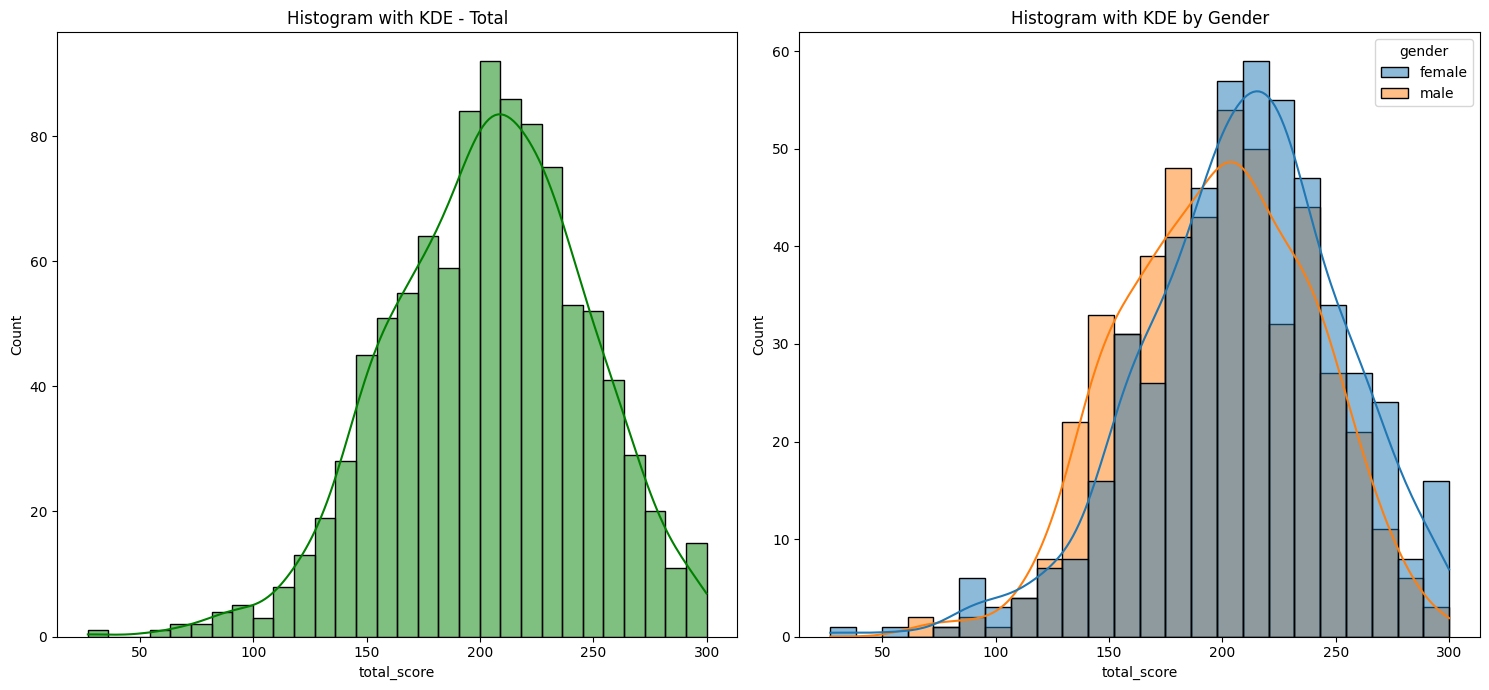

In [48]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.title('Histogram with KDE - Total')

# Subplot 2
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.title('Histogram with KDE by Gender')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histgram with KDE-average')

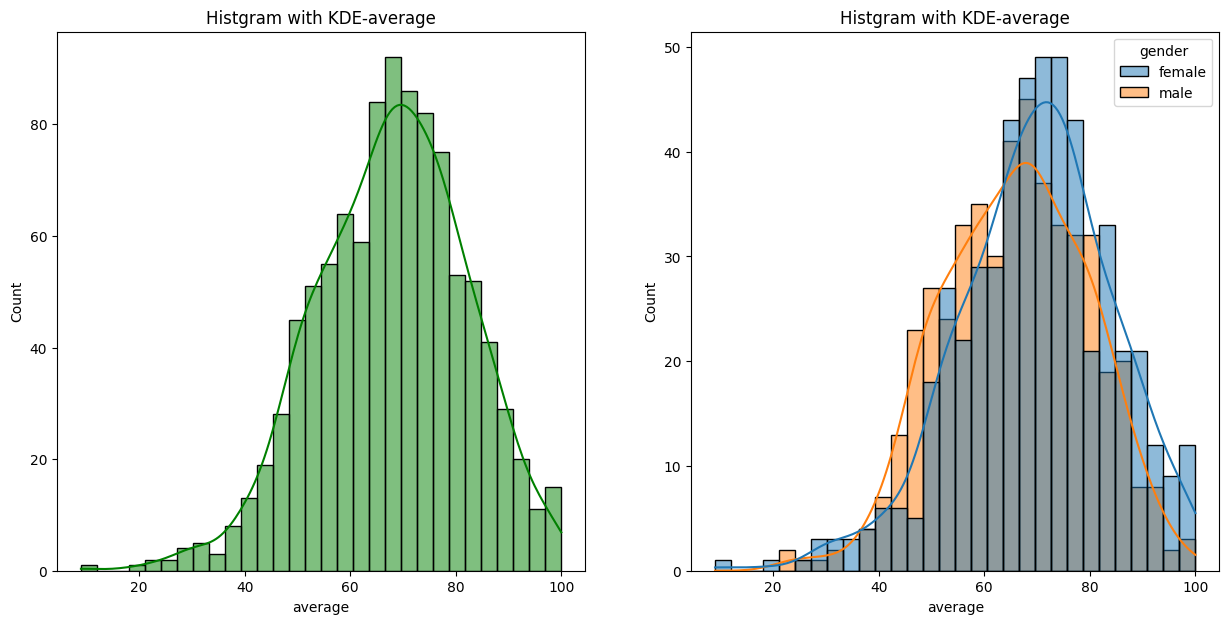

In [49]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
#subplot 1
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.title('Histgram with KDE-average')

#subplot 2
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.title('Histgram with KDE-average')

Insights

- Female students tend to perform better then male students

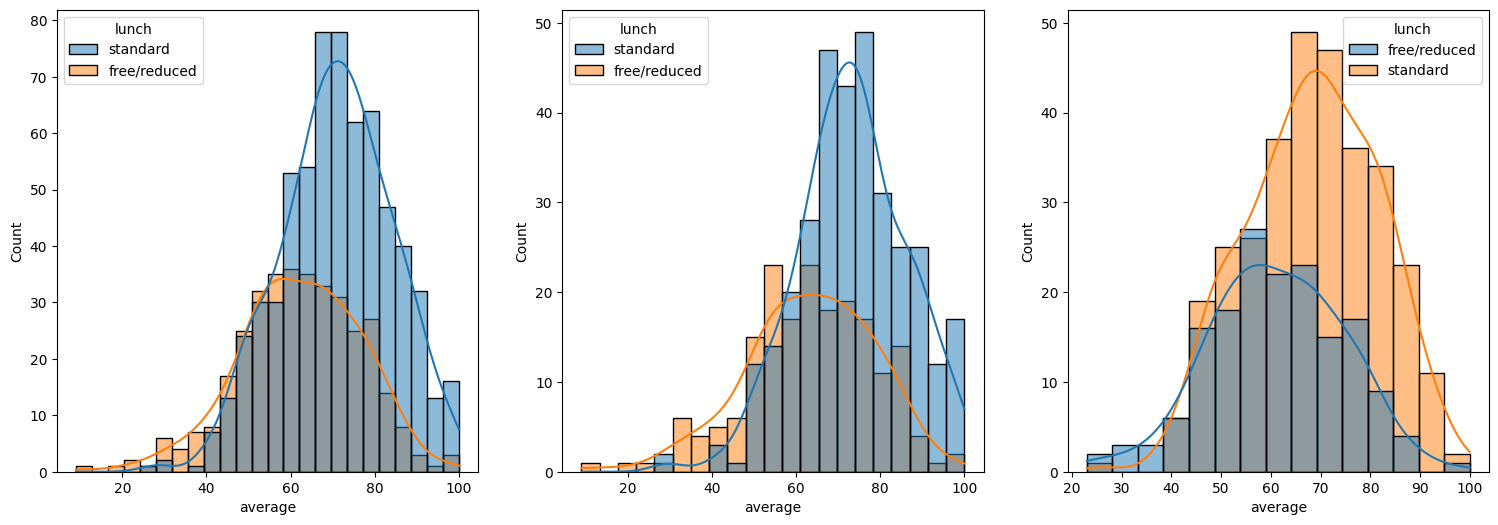

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights

-  Standard lunch helps perform well in exams be it a male or female.

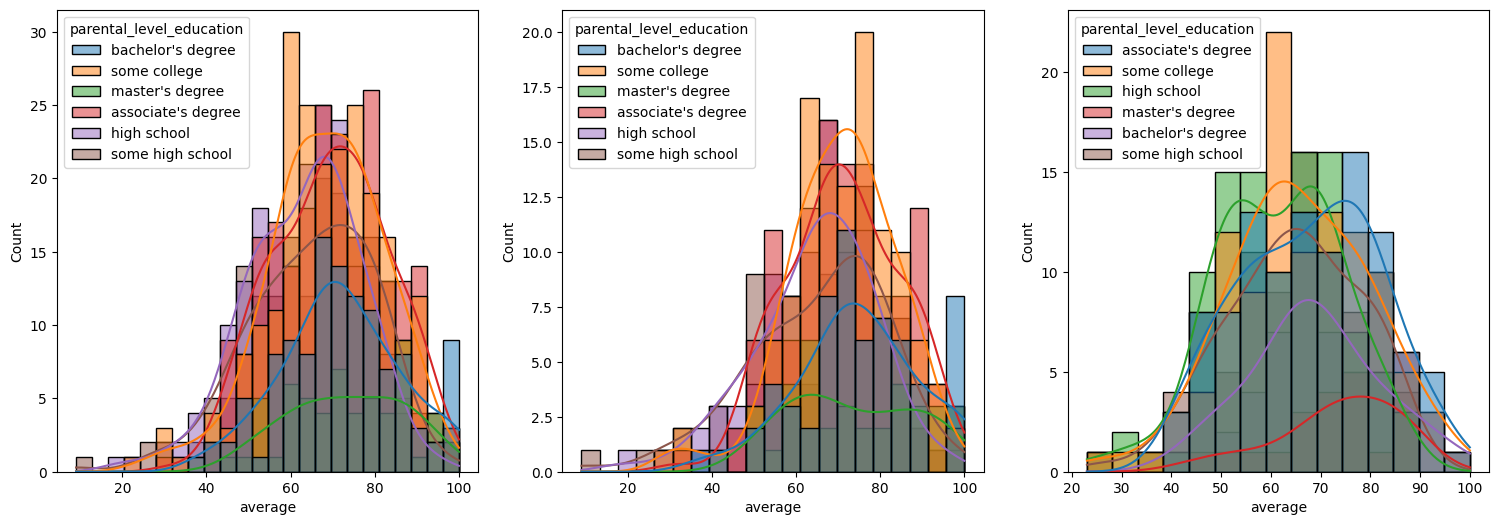

In [51]:
plt.subplots(1,3, figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_education')
plt.show()

Insights

- On male, Parent education makes difference on performing well in exam.
- On female, Parent education has no effect on their exams.

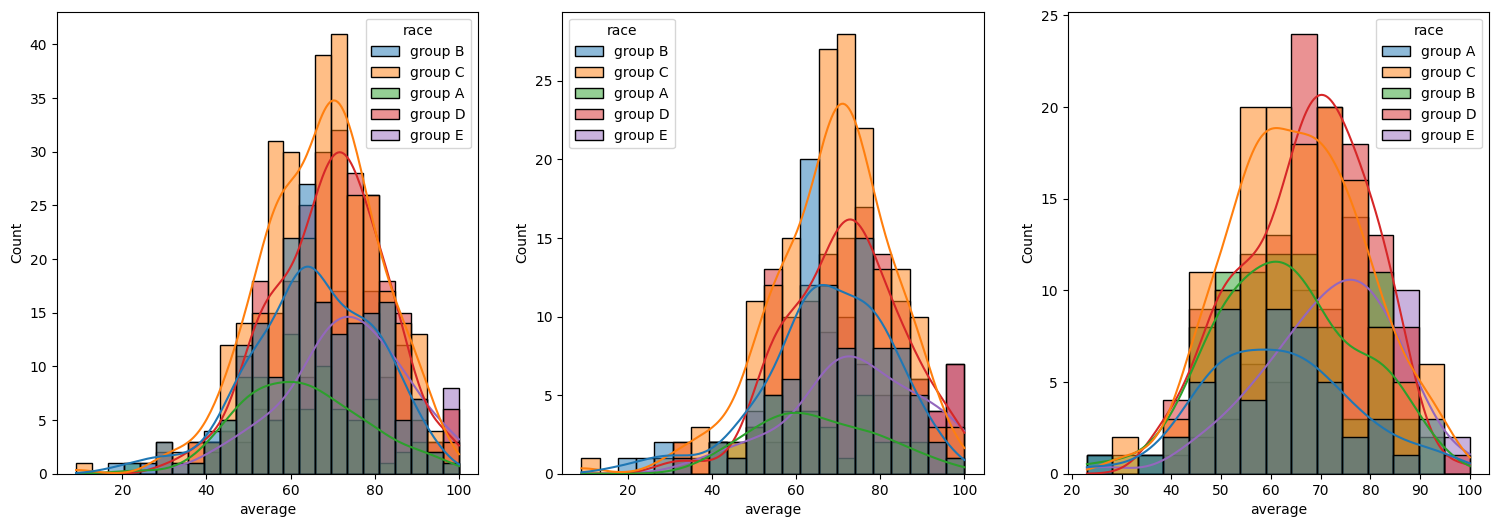

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race')
plt.show()

Insights

- Group A and B perform poorly (male or female) in exams
- Group C female/male performs better then all other groups.

#### 4.2 Maximum score of students in all three subjects

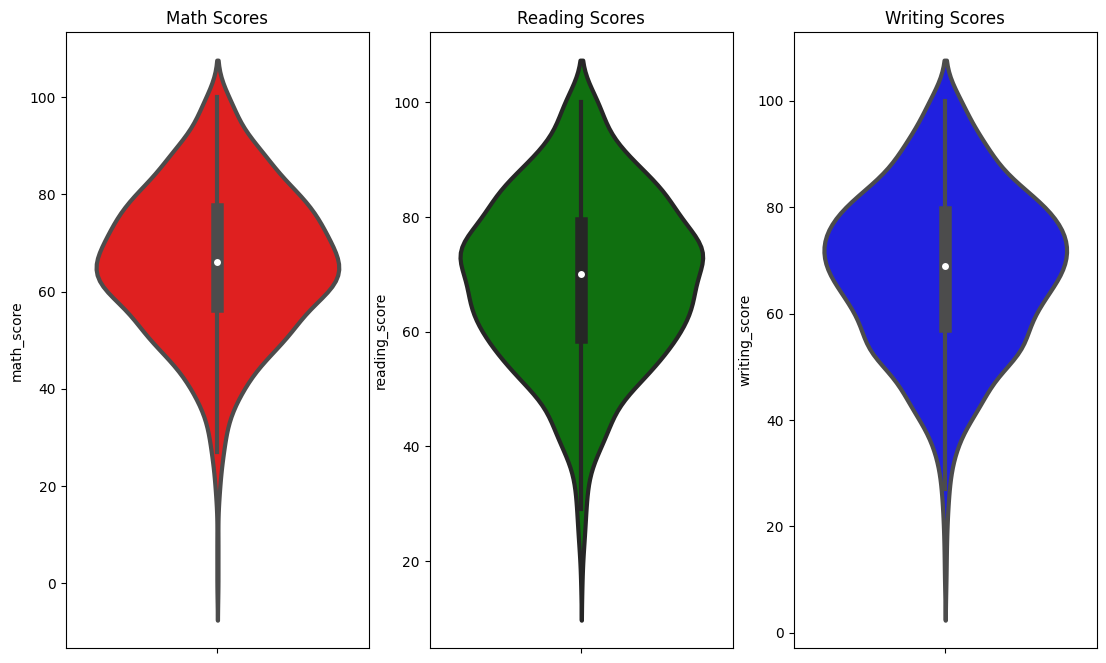

In [53]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insigths

- Most of the students scores between 60 - 80 in Maths whereas for Reading and Writing section the range varies between 50 - 80

#### 4.3 Multivariate analysis using pieplot

In [54]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

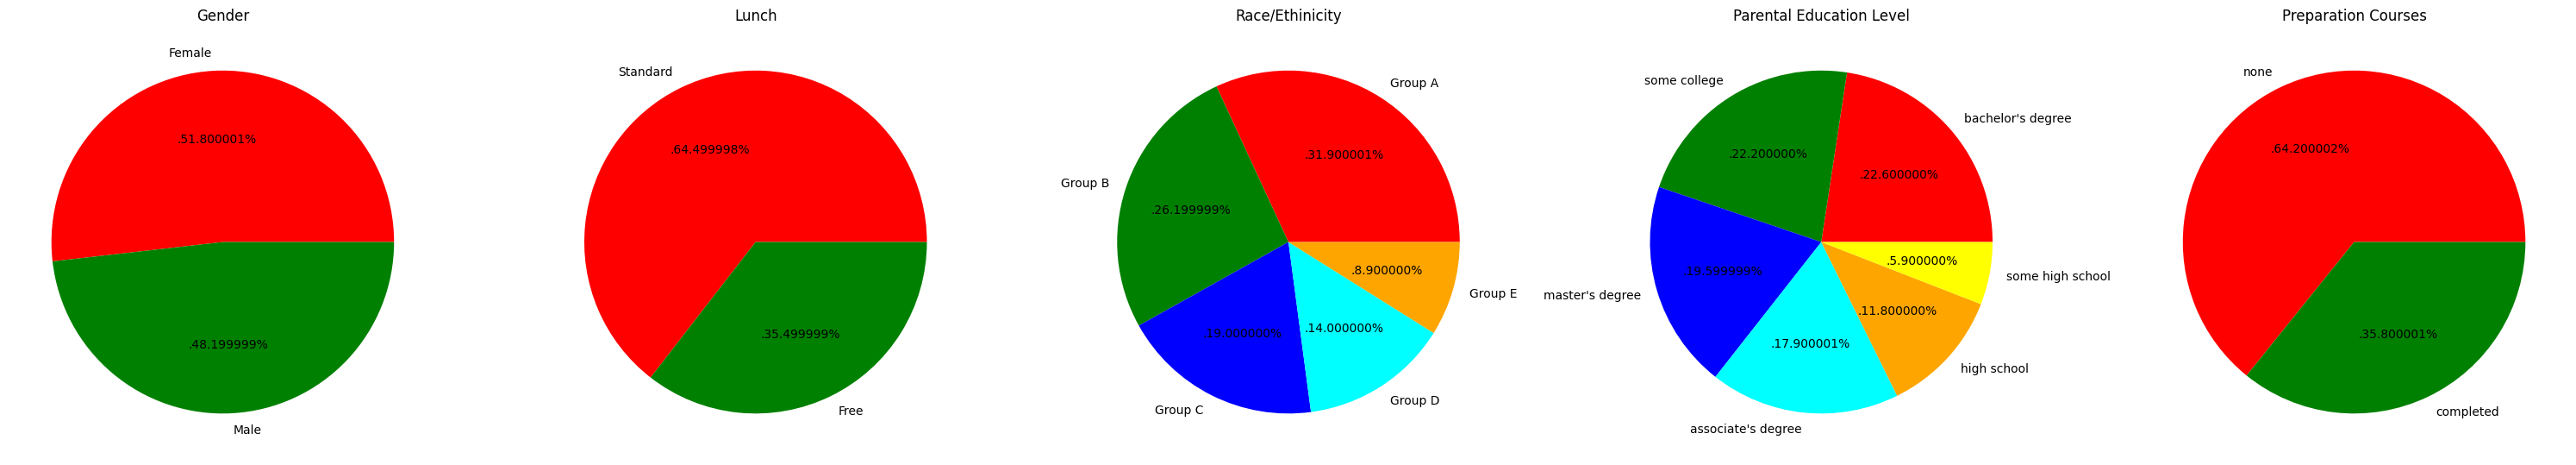

In [55]:
plt.rcParams['figure.figsize'] = (30,20)
plt.subplot(1,5,1)
plt.title('Gender')
size=df['gender'].value_counts()
labels = 'Female','Male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')

plt.subplot(1,5,2)
plt.title('Lunch')
size=df['lunch'].value_counts()
labels = 'Standard','Free'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')

plt.subplot(1,5,3)
plt.title('Race/Ethinicity')
size=df['race'].value_counts()
labels = 'Group A','Group B','Group C','Group D','Group E'
color=['red','green','blue','cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')

plt.subplot(1,5,4)
plt.title('Parental Education Level')
size=df['parental_level_education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school', 
color=['red','green','blue','cyan','orange','yellow']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')

plt.subplot(1,5,5)
plt.title('Preparation Courses')
size=df['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')

plt.tight_layout()
plt.grid()
plt.show()

Insigths:

- Number of Male and female students are almost equal.
- Number of students for standard category are slightly less then double of Free Lunch category students
- Number of are students are greatest in Group C
- Number of students not enrolled in any test preparation courses are greater
- Number of students whose parental education is 'Some College' greater

#### 4.4 Feature Wise Visualization

#### 4.4.1 Gender Column
  
  - How is distribution of Gender?
  - Does gender impact on student's performane ?

Univariate Analysis (How is distribution of Gender ?)

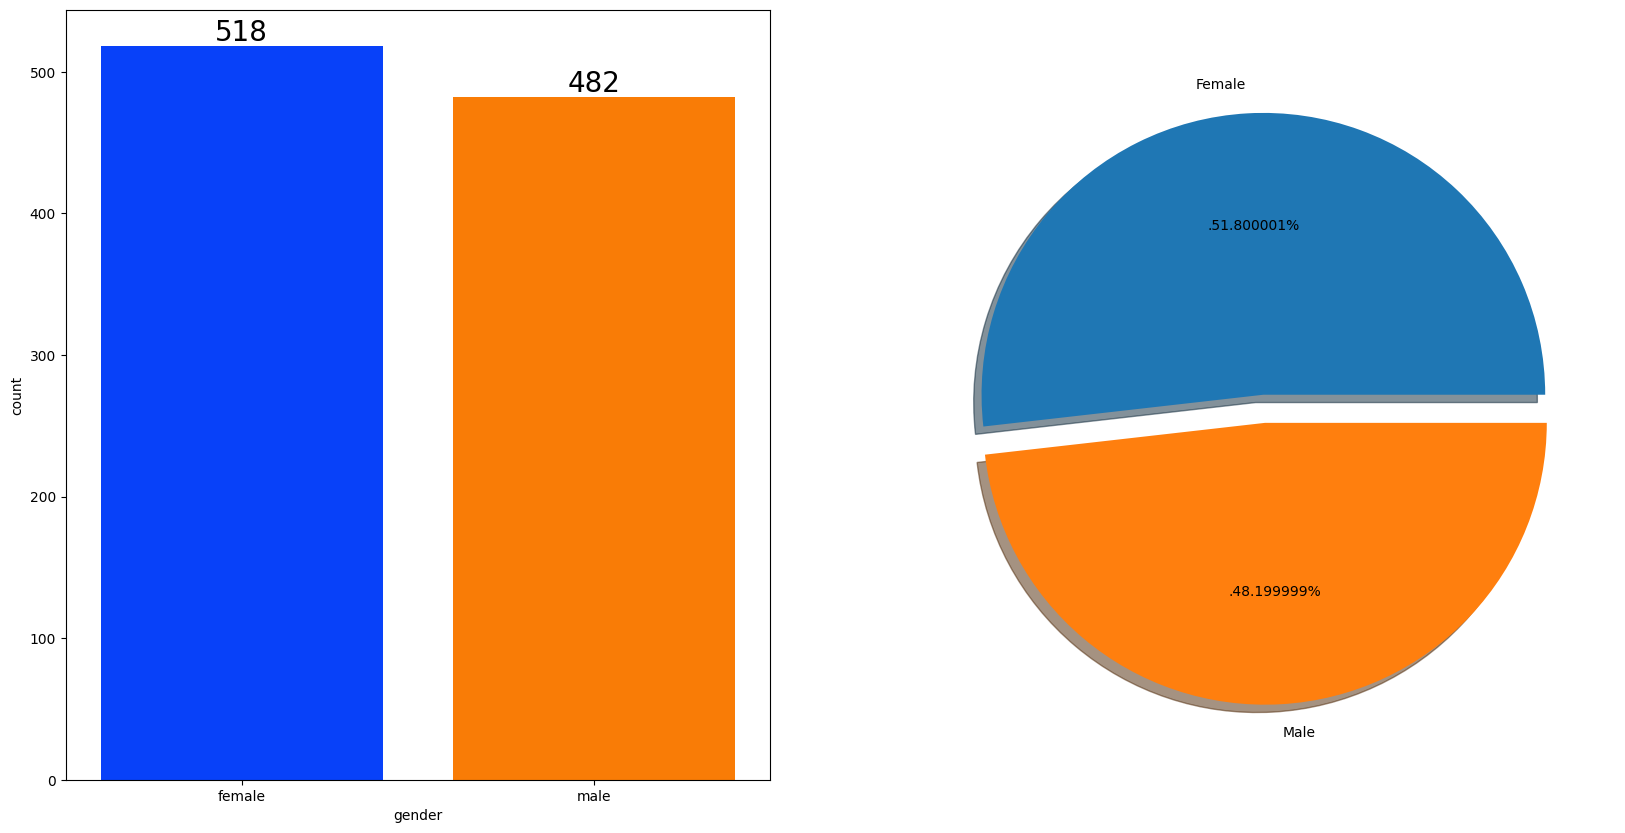

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='.%2f%%',shadow=True)
plt.show()

Insight:

- For Gender the data is balanced for female students are 518(52%) and Male students are 482(48%)

BIVARIATE ANALYSIS (Does gender impact on student's performane ?)

In [57]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
gender_group = df.groupby('gender')[numeric_columns].mean()
print(gender_group)

        math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


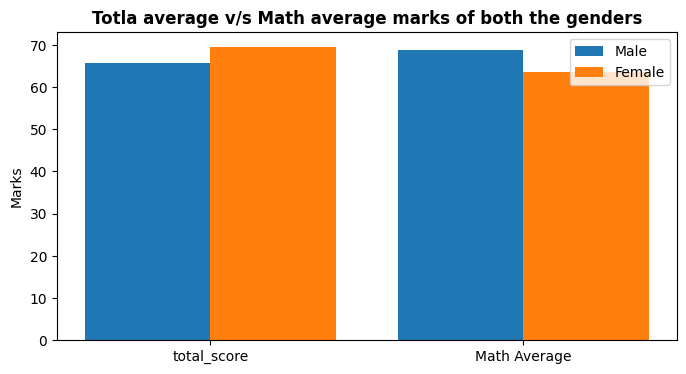

In [58]:
plt.figure(figsize=(8,4))
X = ['total_score','Math Average']
female_score = [gender_group['average'][0],gender_group['math_score'][0]]
male_score = [gender_group['average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Totla average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights:

- On an average female students have better score than mal students, though the Male students Math average is higher than female students.

#### 4.4.2 Race Column

- How is Group wise Distribution?
- Does Race have any impact on student's performance?

Univariate Analysis (How is Group Wise Distribution?)

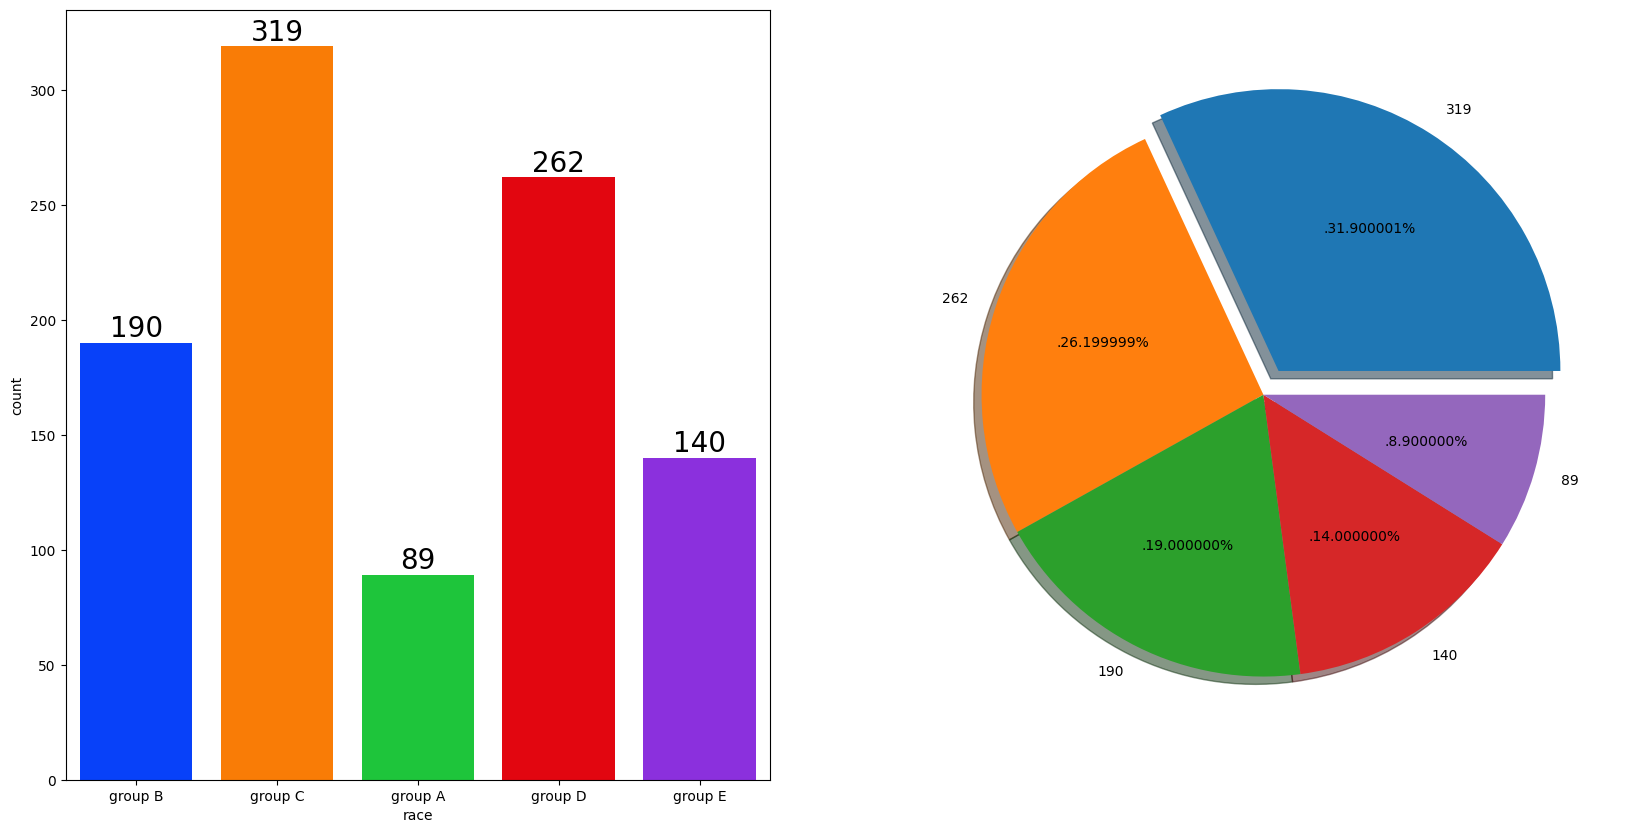

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race'].value_counts(),labels=df['race'].value_counts(),explode=[0.1,0,0,0,0],autopct='.%2f%%',shadow=True)
plt.show()

Insigths:
- Most of the student belongs to Group C / Group D 
- Lowest number belong to Group A

Bivariate Analysis (Does Race have any impact on student's performance?)

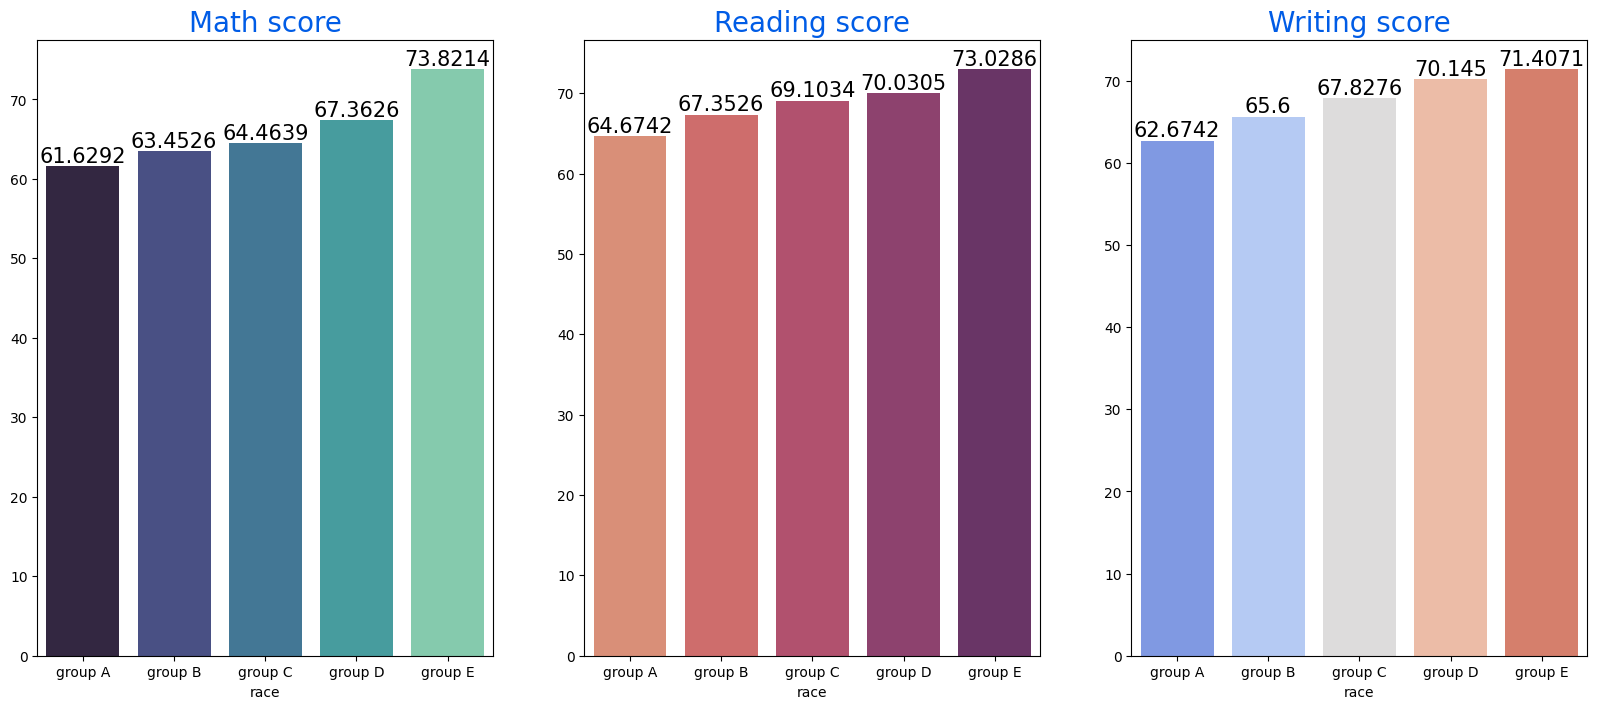

In [60]:
race_group = df.groupby('race')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group['math_score'].mean().index,y=race_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['reading_score'].mean().index,y=race_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_group['writing_score'].mean().index,y=race_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


Insights:
- Group E students have scored the highest.
- Group A students have scored the lowest

### 4.4.3 Parental Educational Level Feature

- What is education background of student's parents?
- Does it have any impact on the student performance?

Univariate Analysis (What is education background of student's parents?)

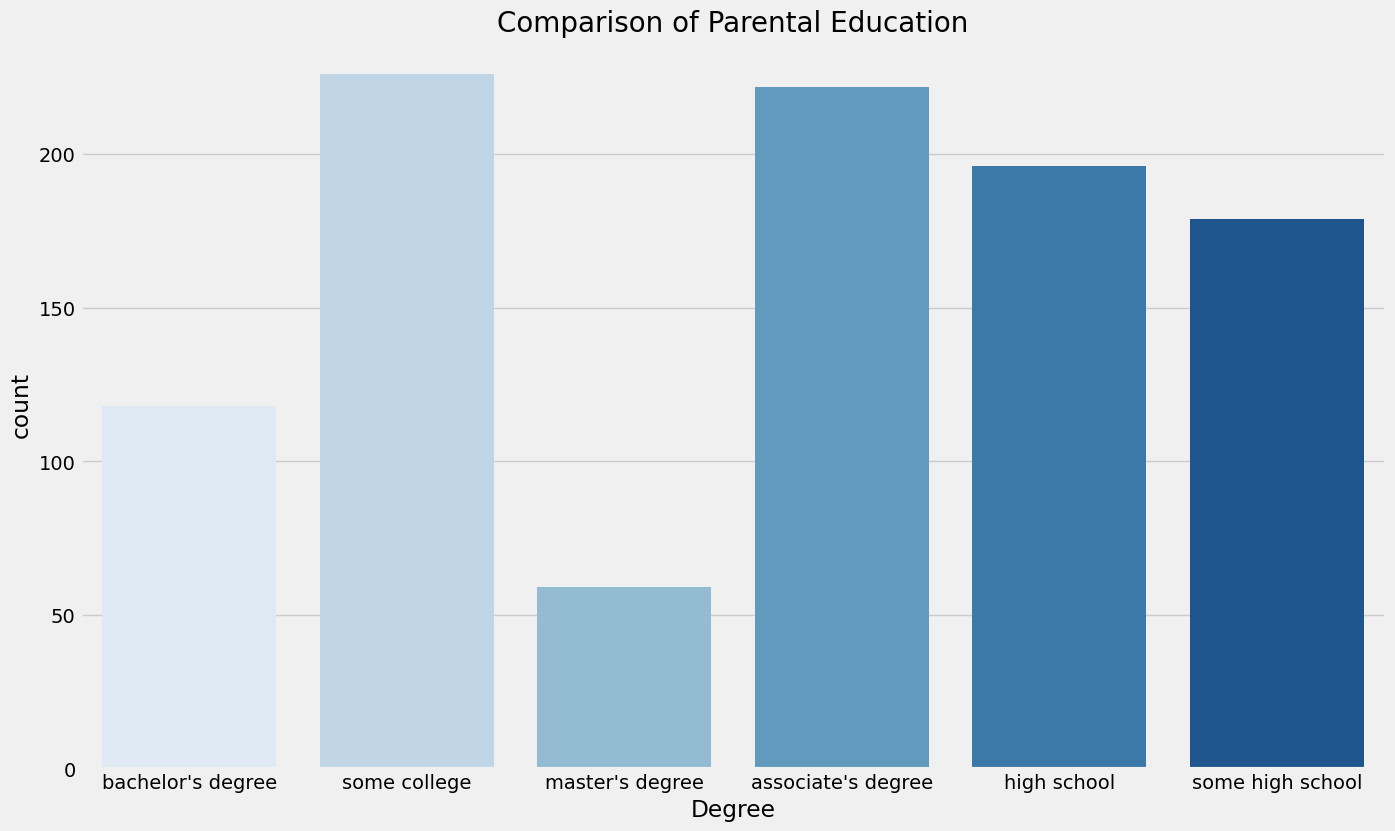

In [61]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x='parental_level_education', palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insigths:

- Large number of students parents are from achieved some college level or associate's degree level education

Bivariate Analysis (Does it have any impact on the student performance?)

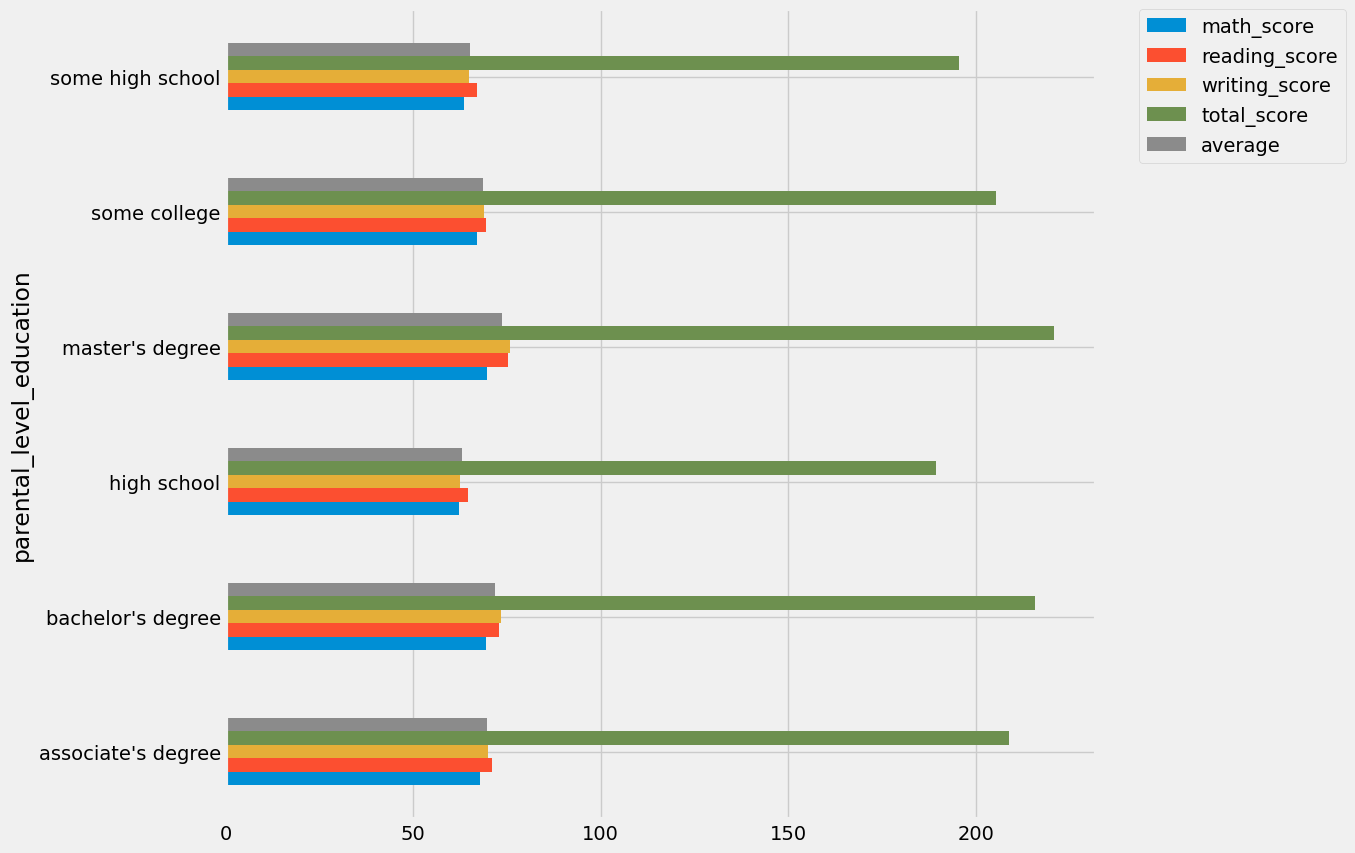

In [62]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df.groupby('parental_level_education')[numeric_columns].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights:

- The total scores for bachelors and Masters degree are higher than other.

4.4.4 Lunch Feature 

- Which type of lunch is most common among students?
- What is the effect of the lunch type on the results?

Univariate Analysis (Which type of lunch is most common among students?)

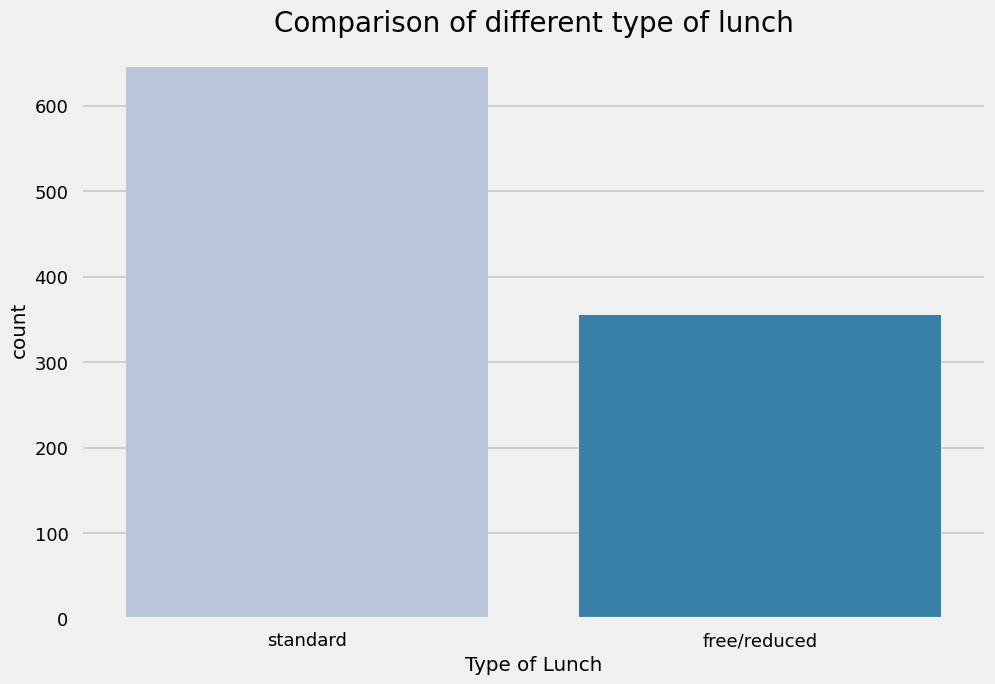

In [63]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data=df, x='lunch', palette = 'PuBu')
plt.title('Comparison of different type of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Type of Lunch')
plt.ylabel('count')
plt.show()

Insights:

 - Students preferred standard lunch mostly as compare to free/reduced lunch.

Bivariate Analysis (What is the effect of the lunch type on the results?)

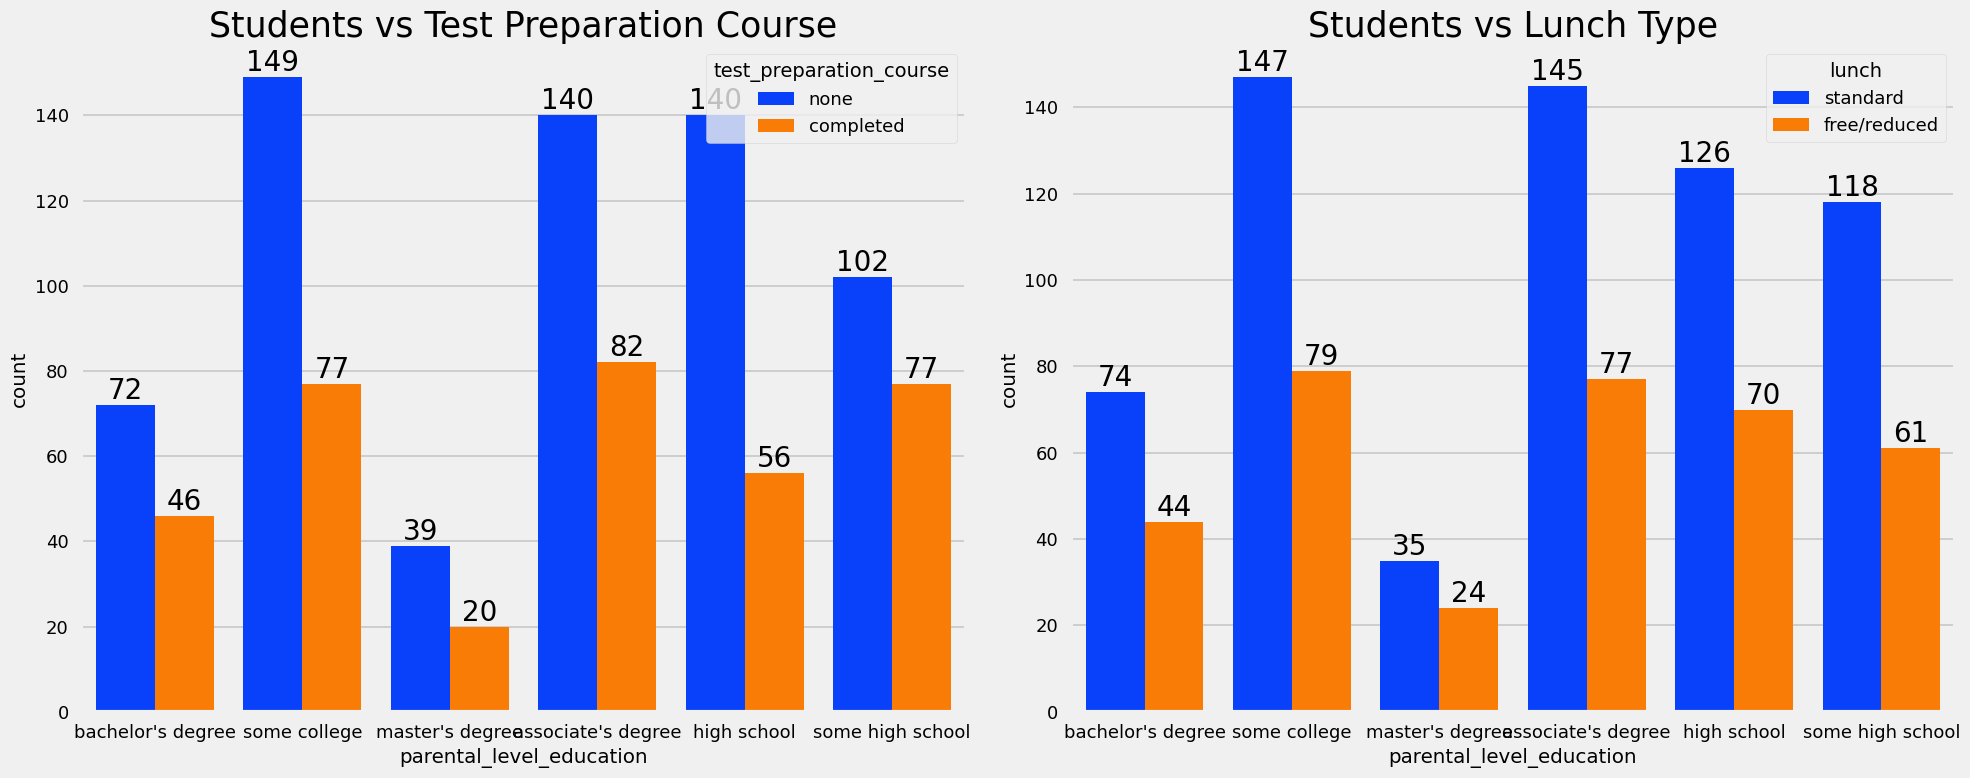

In [64]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x='parental_level_education', data=df, palette='bright', hue='test_preparation_course',
              saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
sns.countplot(x='parental_level_education', data=df, palette='bright', hue='lunch',
              saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
plt.tight_layout()
plt.show()

Insights:
- Both the scenarios indicates that Standard lunch intake tends to perform well without enrolling into test preparation courses.

### 4.4.5 Test Preparation Course 

- What is the demand of the Test Preparation Courses?
- Does test preparation course have any impact on students performance?

Univariate Analysis (What is the demand of the Test Preparation Courses?)

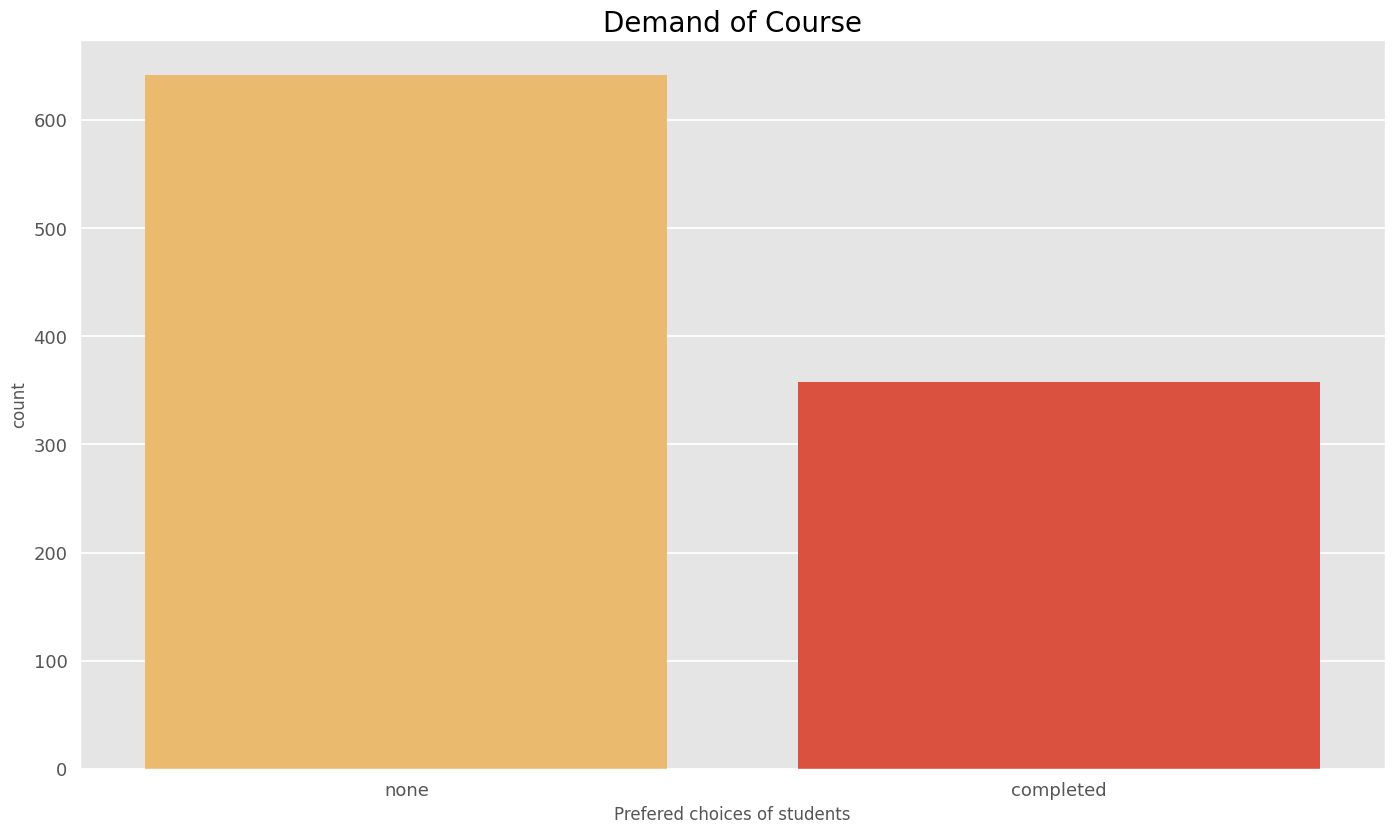

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
sns.countplot(data=df, x='test_preparation_course', palette = 'YlOrRd')
plt.title('Demand of Course', fontweight = 30, fontsize = 20)
plt.xlabel('Prefered choices of students')
plt.ylabel('count')
plt.show()

Insights:

- The demand for test preparation course is less and students prefered to do self study for exam. 

Bivariate Analysis (Does test preparation course have any impact on students performance?)

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

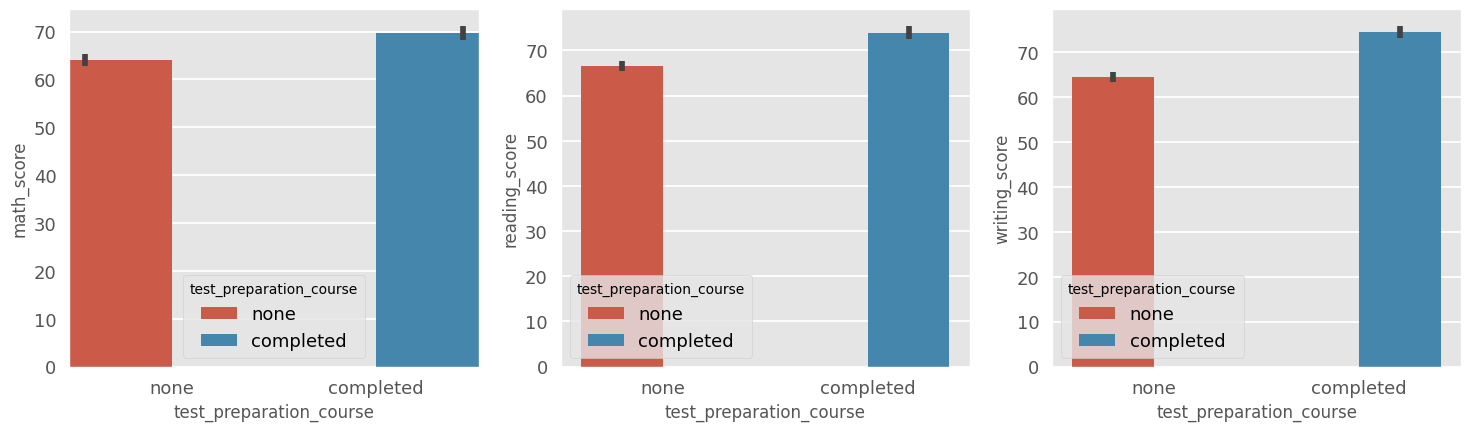

In [66]:
plt.figure(figsize=(16,15))
plt.subplot(3,3,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'], hue=df['test_preparation_course'], width=1.7)
plt.subplot(3,3,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(3,3,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'], hue=df['test_preparation_course'])

Insigths:
- Students who have completed the course have high chances of scoring better in all the subjects.
- Reading and writing scores are highly impacted if students prepare for the exam by nrolling the course.

### 4.4.6 Checking Outliers

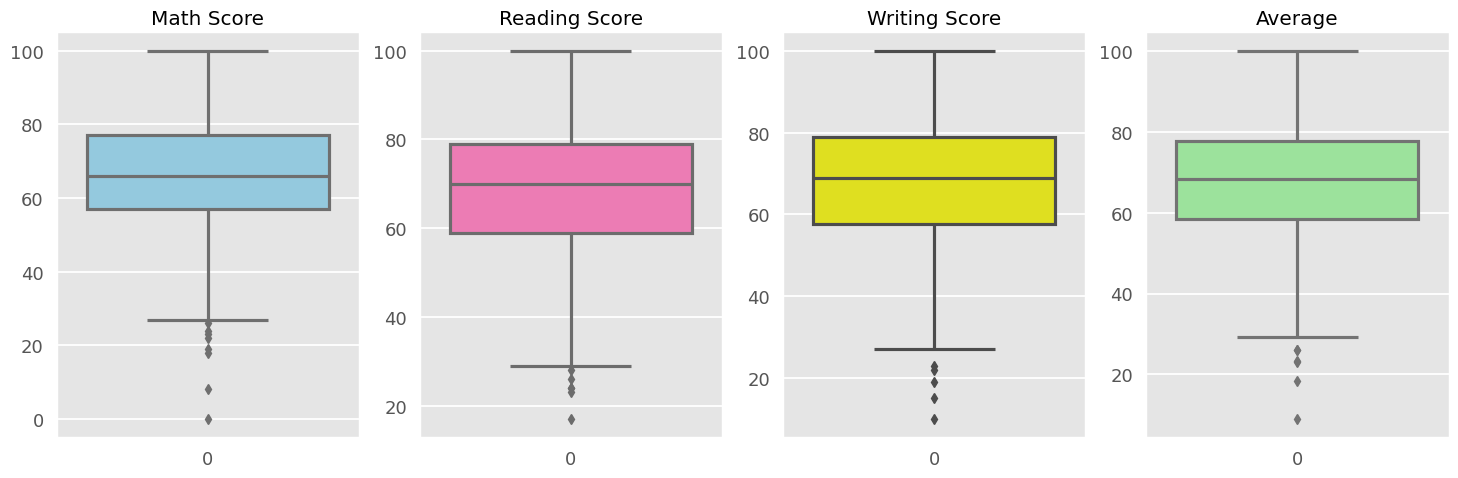

In [67]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
plt.title('Math Score')
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
plt.title('Reading Score')
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
plt.title('Writing Score')
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
plt.title('Average')
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 Multivariate Analysis Using Pairplot

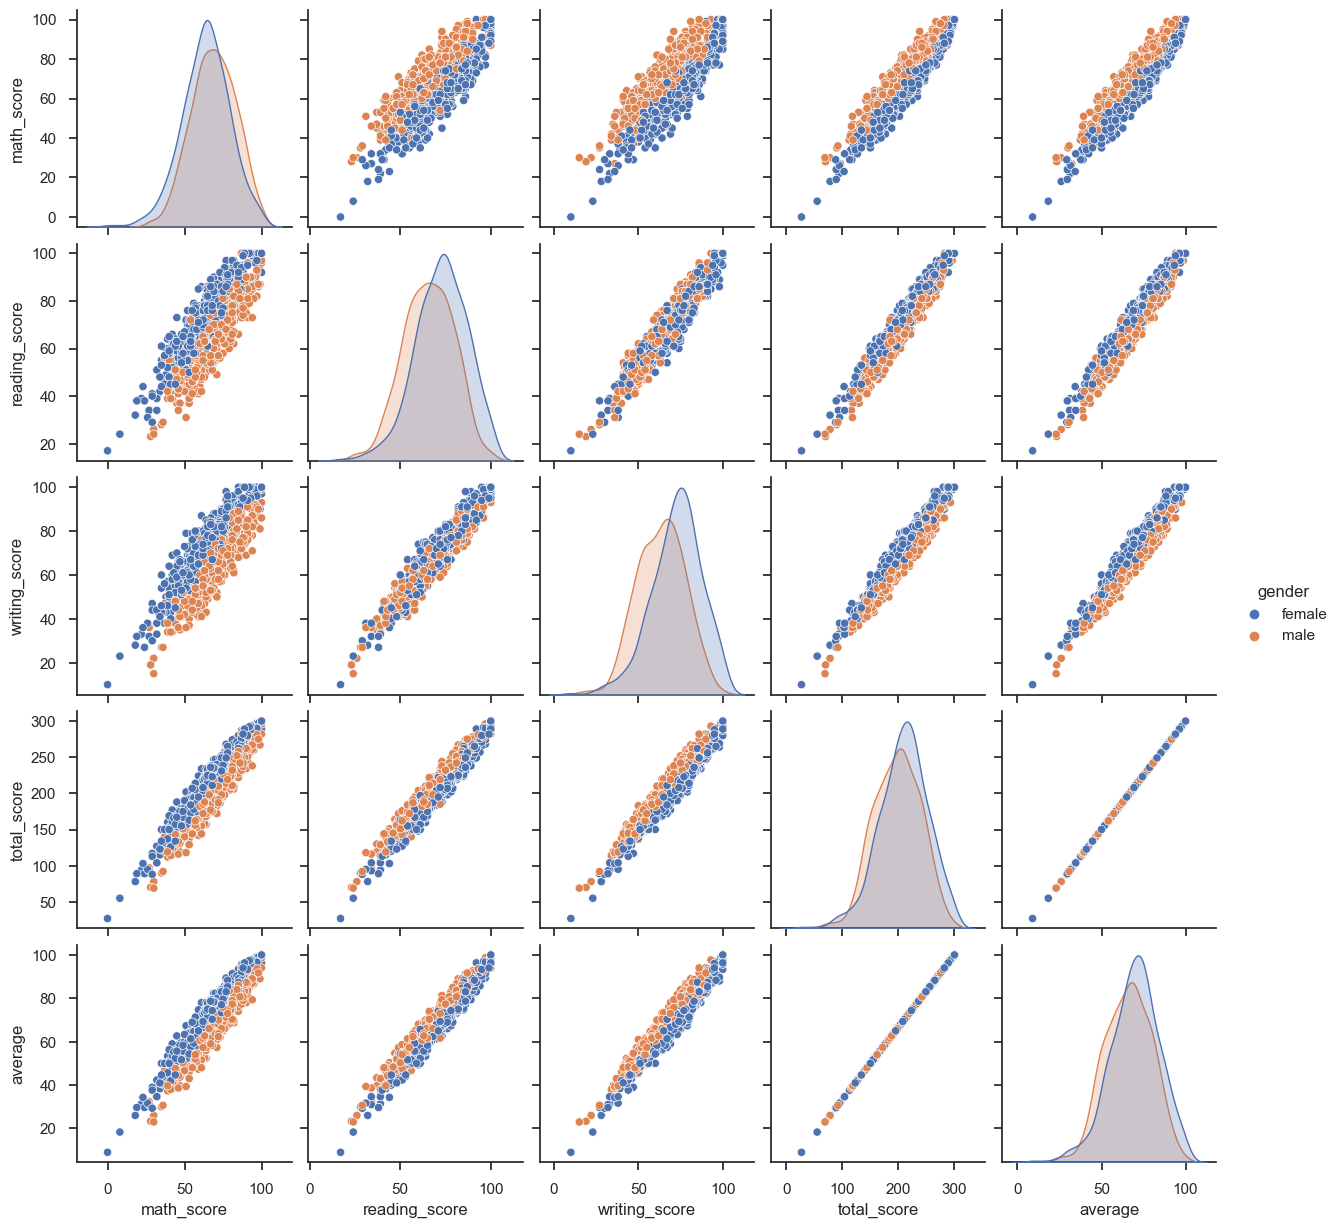

In [68]:
sns.set(style="ticks")
sns.pairplot(df,hue='gender')
plt.show()

Insights:
- From above plot it is clear that all scores increase linearly.

### 5. Conclusions
- Student's performance is related with race, lunch and parental education.
- Female students are smarter than males and performes better.
- Student's performance is not much related to test preparation course but finishing course is beneficial.